# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Solana And Ethereum Recover After Registering Double-Digit Gains.  Ethereum and Solana especially galloped up on their charts significantly in the last 24 hours. Bitcoin had also reclaimed the $40k price mark at the time of writing therefore major altcoins followed a similar price movement. The massive attack on Wormhole which is an eminent bridge protocol between Solana and Ethereum caused ETH to lose close to 8% while depreciating SOL by double-digits. At the time of writing, Solana was seen trading for $109.18 after SOL was parked below the $100 mark yesterday. Ethereum was seen changing hands for $2953.03 and could soon eye the $3000 price level with continued bullishness in the market. Buyers for both the asset resurfaced at press time, pushing the coins near the overbought zone. Related Reading &#124; Bitcoin Leverage Ratio Suggests More Decline May Be Coming Solana Price Analysis: Four/Hour Chart Post dropping from the $100, Solana reclaimed the aforementioned price level and registered a sharp recovery of about 12%. Overhead resistance for SOL rested at $131.58, while, a push below the current price level will make the coin trade at $102.27. The technical outlook of Solana was quite bullish at the time of writing. Additional price floor awaited at $156.43 while support region stood near $96. The price of the altcoin was seen parked above the 20-SMA line. This reading indicated that sellers were responsible for driving the price momentum of the asset in the market. The Relative Strengt... ... [| Skaityti daugiau](https://www.newsbtc.com/news/solana-and-ethereum-recover-after-registering-double-digit-gains/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Toronto police shut down roads, plan to limit disruption ahead of convoy protest | CBC News.  In advance of a convoy protest against COVID-19 health measures in Toronto this weekend, police and city officials say they are doing whatever they can to minimize disruption for residents and provide a safe space for demonstrators to voice their concerns. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/toronto/toronto-convoy-covid-protest-1.6339563) 

### Kainų kaita pandemijos metu

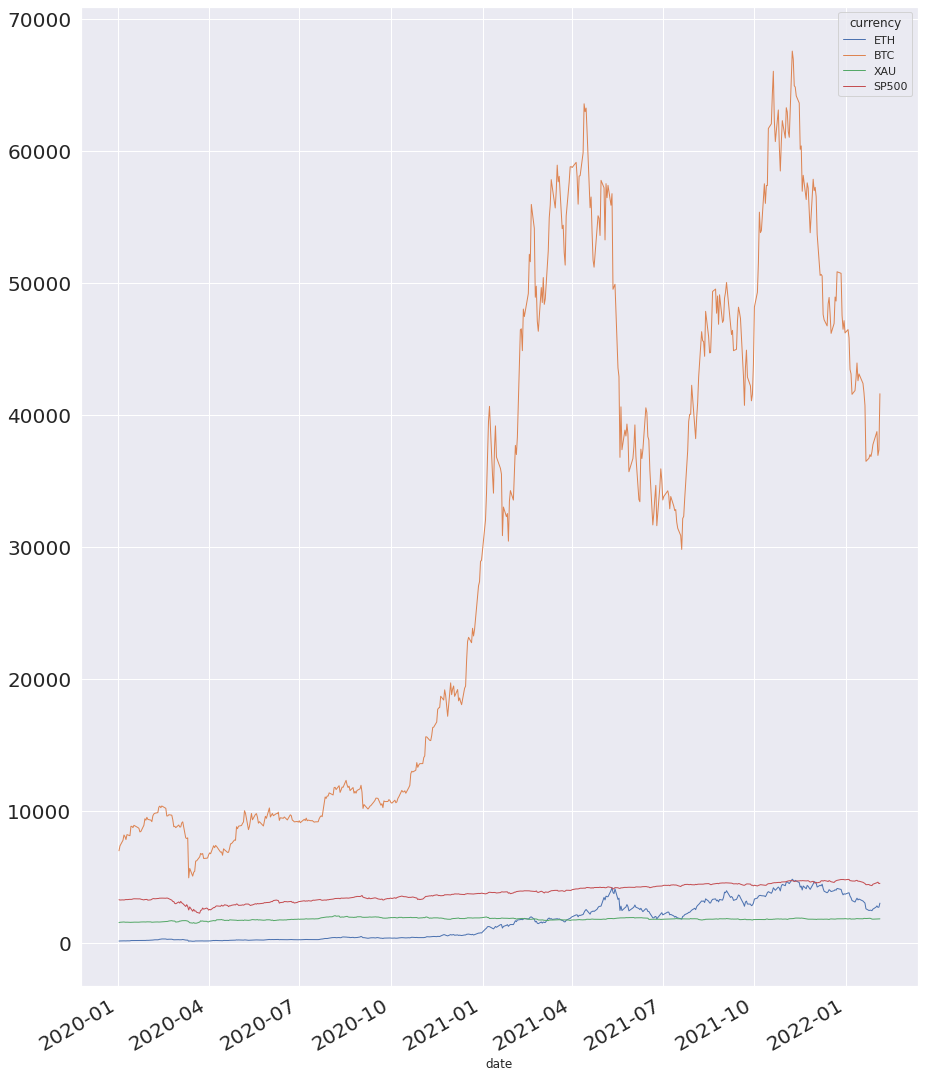

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903045,0.156840,0.917682
BTC,0.903045,1.000000,0.138286,0.871366
XAU,0.156840,0.138286,1.000000,0.301907
SP500,0.917682,0.871366,0.301907,1.000000


In [8]:
#hide ### Koreliacijos matrica.

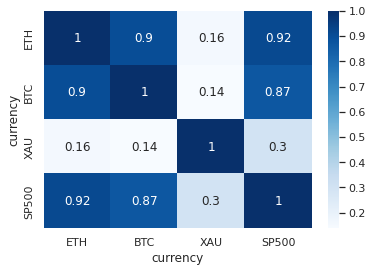

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')